Nama : William Yulio

NIM : 2301869840

Kelas : LD01

### Import Library

In [1]:
!pip install --upgrade tensorflow==1.15

Requirement already up-to-date: tensorflow==1.15 in /usr/local/lib/python3.7/dist-packages (1.15.0)


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Menginisialisasi library yang akan digunakan selama proses coding

### Load Dataset

In [3]:
def load_dataset():
    data = load_digits()
    feature = data['data']
    label = data['target']

    return feature, label

feature, label = load_dataset()
# Tahap pertama yang harus dilakukan adalah load dataset, pada soal kali ini saya membuat function agar dapat dipanggil dengan mudah saja
# karena untuk nomor 3 kita tidak ada memilih kelas, sehingga data bisa diassign sesuai dengan kebutuhan dimana variabel feature akan menampung dataset "data" dan label akan menampung dataset "target"
# Selanjutnya saya langsung memanggil fungsi tersebut dan di assign kedalam variabel feature dan label

### Preprocessing Data

In [4]:
feature = feature.reshape((len(feature), -1))
label = label.reshape(label.shape[0],-1)

scaler = MinMaxScaler()
feature = scaler.fit_transform(feature)

encoder = OneHotEncoder(sparse=False)
label = encoder.fit_transform(label)

# Tahap selanjutnya ada melakukan proses preprocessing data, dimana sebelumnya saya mereshape variabel feature dan label agar dapat dikalkulasi nantinya
# Kemudian menggunakan MinMaxScaler sehingga data feature dapat dengan mudah diproses dan OneHotEncoder kepada label, sehingga label menjadi angka 0 dan 1
# Hal ini dilakukan juga untuk mempercepat proses kalkulasi nantinya

### Split Data

In [5]:
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size = 0.2)

# Pada tahap ini saya akan melakukan split dataset untuk memisahkan data mana yang akan digunakan untuk training dan untuk testing baik itu data input maupun output
# Saya menggunakan fungsi train_test_split() untuk proses split dataset ini dengan data_input sebagai x dan data_output sebagai y
# Sesuai dengan soal saya memisahkan dataset ini dengan ketentuan 80% untuk training dan 20% untuk testing

### Membuat Neural Network dan Menentukan Weight dan Bias

In [6]:
layer = {
    "input": 64,
    "hidden": 10,
    "output": 10
}

weight = {
    "to_hidden": tf.Variable(tf.random_normal([layer['input'], layer['hidden']])),
    "to_output": tf.Variable(tf.random_normal([layer['hidden'], layer['output']]))
}

bias = {
    'to_hidden': tf.Variable(tf.random_normal([layer['hidden']])),
    'to_output': tf.Variable(tf.random_normal([layer['output']]))
}

# Dalam tahap ini saya akan membuat neural network dengan mendeklarasi layer input, hidden dan output dan menentukan jumlah neuron yang terdapat didalamnya
# Selanjutnya juga menentukkan bobot weight dan bias pada setiap layer secara random dengan menggunakan fungsi tf.random_normal
# Setiap weight dan bias akan di assign ke masing masing layer

### Membuat Placeholder

In [7]:
input_tensor = tf.placeholder(tf.float32, [None, layer['input']])
target_tensor = tf.placeholder(tf.float32, [None, layer['output']])

learning_rate = 0.5
epoch = 50000

# Pada tahap ini saya akan membuat placeholder dengan menggunakan fungsi tf.placeholder, placeholder sendiri digunakan untuk memberi makan contoh pelatihan aktual (untuk feed_dict)
# Kita juga menggunakan tipe data float 32, karena memang sudah default untuk setiap fungsi tensor flow hanya menerima data yang memiliki tipe data float 32
# Saya akan menggunakan epoch sebanyak 50000 dan learning rate sebsar 0.5

### Activation Function

In [8]:
def feed_forward():
    u = tf.matmul(input_tensor, weight['to_hidden']) + bias['to_hidden']
    y = tf.nn.sigmoid(u)
    o = tf.matmul(y, weight['to_output']) + bias['to_output']
    z = tf.nn.sigmoid(o)
    return z
# Selanjutnya kita masuk kedalam fungsi feed_forward(), fungsi ini akan digunakan untuk menghitung activation function
# baik itu pada saat melakukan feed forward maupun back propagate, dalam activation function ini kita menggunakan sigmoid

In [9]:
output = feed_forward()
error = tf.reduce_mean(.5*(target_tensor-output)**2)
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

# Saya memanggil 3 variabel penampung untuk membantu proses training data nantinya
# output akan menampung hasil dari proses activation function
# error akan menghitung lost function dengan menggunakan rumus yang ada
# train akan berfokus untuk mengkalkulasi proses training, pada proses ini saya menggunakan GradientDescentOptimizer agar mendapatkan hasil yang optimal dan juga dapat meminimalisir error

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
v_acc1 = []
v_acc2 = []

# Saya membuat variabel penampung ini untuk menampung hasil akurasi dari proses training dengan testing apakah memiliki hasil yang sama atau tidak

### Back Propagate

In [11]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(epoch+1):
        sess.run(train, feed_dict = {
            input_tensor: x_train, 
            target_tensor: y_train
        })

        if i % 5000 == 0:
            true_predict = tf.equal(tf.argmax(output, axis = 1), tf.argmax(target_tensor, axis = 1))
            prediction = tf.argmax(output, axis = 1)
            acc = tf.reduce_mean(tf.cast(true_predict, tf.float32))
            prediction = sess.run(prediction, feed_dict = {
                input_tensor: x_test,
                target_tensor: y_test
            })
            acc1 =  sess.run(acc, feed_dict = {
                input_tensor: x_train,
                target_tensor: y_train
            })
            acc2 =  sess.run(acc, feed_dict = {
                input_tensor: x_test,
                target_tensor: y_test
            })
            v_acc1.append(acc1)
            v_acc2.append(acc2)
            print(f'Epoch: {i},  Accuracy_testing: {acc2*100}%')
            print(f'Accuracy_training: {acc1*100}%')

        # Selanjutnya saya akan memanggil sess.run(tf.global_variables_initializer()), yang merupakan API dari tensorflow
        # Pada tahap ini kita akan memasukkan data training pada x_train dan y_train kedalam placeholder yang sudah dibuat sebelumnya dengan menggunakan feed_dict()
        # Selanjutnya kita akan melakukan proses perhitungan setiap epoch ke 5000, perhitungan yang dilakukan adalah menghitung prediksi dari dataset kelas tersebut
        # Dan juga menghitung akurasi dari setiap prediksi, seperti halnya dengan training. Kalkulasi ini berjalan ketika kita panggil menggunakan feed_dict
        # Selanjutnya saya juga akan memasukkan data akurasi hasil testing dan training kedalam variabel v_acc1 dan v_acc2 untuk dibandingkan seberapa mirip akurasinya satu dengan lainnya

Epoch: 0,  Accuracy_testing: 8.888889104127884%
Accuracy_training: 9.672929346561432%
Epoch: 5000,  Accuracy_testing: 34.99999940395355%
Accuracy_training: 36.04732155799866%
Epoch: 10000,  Accuracy_testing: 59.16666388511658%
Accuracy_training: 58.31593871116638%
Epoch: 15000,  Accuracy_testing: 74.44444298744202%
Accuracy_training: 70.77244520187378%
Epoch: 20000,  Accuracy_testing: 83.61111283302307%
Accuracy_training: 80.86290955543518%
Epoch: 25000,  Accuracy_testing: 83.88888835906982%
Accuracy_training: 84.34237837791443%
Epoch: 30000,  Accuracy_testing: 83.61111283302307%
Accuracy_training: 85.5949878692627%
Epoch: 35000,  Accuracy_testing: 84.44444537162781%
Accuracy_training: 87.19554543495178%
Epoch: 40000,  Accuracy_testing: 87.22222447395325%
Accuracy_training: 89.56158757209778%
Epoch: 45000,  Accuracy_testing: 88.88888955116272%
Accuracy_training: 91.64927005767822%
Epoch: 50000,  Accuracy_testing: 90.55555462837219%
Accuracy_training: 93.31941604614258%


### Validation Curve Graph

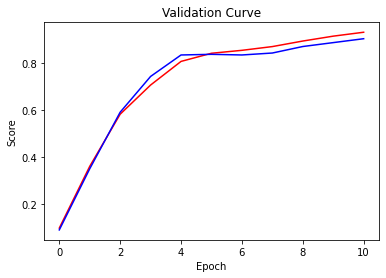

In [12]:
plt.plot(v_acc1, 'r')
plt.plot(v_acc2, 'b')
plt.title('Validation Curve')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.show()

# Selanjutnya sebagai tahap evaluasi saya melakukan plotting dengan membuat validation curve graph untuk menunjukkan score dari setiap proses epoch
# dapat dilihat bahwa model dapat belajar dengan baik dilihat dari hasil score yang terus meningkat seiring dengan epochnya

### Confusion Matrix

In [13]:
feature = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_test = y_test.dot(feature).astype(int)
y_train = y_train.dot(feature).astype(int)

In [14]:
confusionMatrix = metrics.confusion_matrix(y_test, prediction)
print("Confusion matrix:\n{}".format(confusionMatrix))

# Untuk proses pembuatan confussion matrix saya meenggunakan fungsi metrics.confusion_matrix() untuk dapat melihat banyak prediksi yang tepat dan yang salah

Confusion matrix:
[[36  0  0  0  1  0  0  0  0  0]
 [ 0 38  0  0  0  1  1  0  2  1]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 1  0  2 33  0  0  0  4  0  0]
 [ 0  2  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  1 31  0  0  0  1]
 [ 0  0  0  0  0  0 41  0  0  0]
 [ 0  0  0  1  0  0  0 30  0  1]
 [ 0  3  2  0  0  1  0  0 23  4]
 [ 0  2  0  0  0  1  0  0  2 26]]


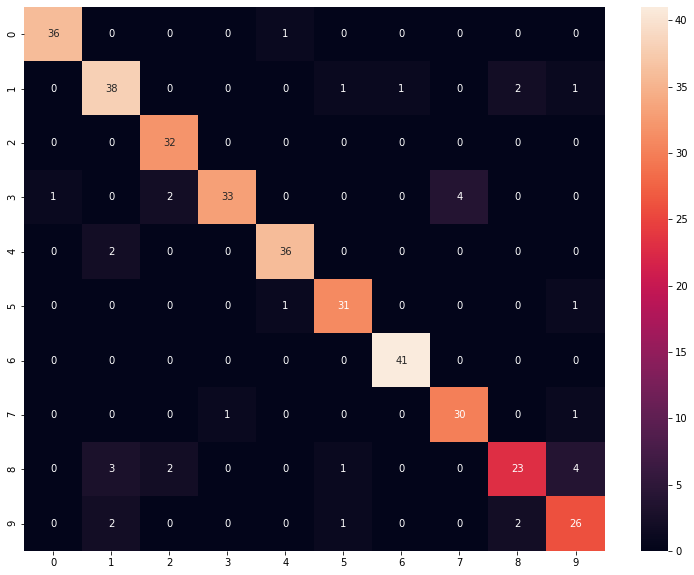

In [15]:
df_cm = pd.DataFrame(confusionMatrix, range(10), range(10))
plt.figure(figsize=(13,10))
sn.heatmap(df_cm, annot=True)
plt.show()

# Saya melakukan ploting sejumlah dengan kelas yang ada didalam data sehingga membentuk hasil yang diagonal seperti dibawah ini

In [16]:
print(classification_report(y_test, prediction))

# Selanjutnya saya juga membuat classification_report, dan ternyata mendapat hasil yang cukup baik dari berbagai kelas target

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.84      0.88      0.86        43
           2       0.89      1.00      0.94        32
           3       0.97      0.82      0.89        40
           4       0.95      0.95      0.95        38
           5       0.91      0.94      0.93        33
           6       0.98      1.00      0.99        41
           7       0.88      0.94      0.91        32
           8       0.85      0.70      0.77        33
           9       0.79      0.84      0.81        31

    accuracy                           0.91       360
   macro avg       0.90      0.90      0.90       360
weighted avg       0.91      0.91      0.90       360

